# MNISTDigit Recognizer using a Shallow Neural Network
![](https://www.kaggle.com/competitions/3004/images/header)

## Problem Statement
This is a Notebook designed to implement a Shallow Neural Network with One Hidden Layer to predict/recognize digits given an image

> View and download the data here: https://www.kaggle.com/competitions/digit-recognizer

## Download and install the proper libraries

In [1]:
!pip install numpy pandas-profiling matplotlib opendatasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=12ba86c673af310668502ed20a820e14d021288a58e81513597254680a25c833
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import os
import copy
import math

In [3]:
od.download('https://www.kaggle.com/competitions/digit-recognizer')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jordanyan
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 83.8MB/s]


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [4]:
os.listdir('digit-recognizer')

['test.csv', 'train.csv', 'sample_submission.csv']

In [5]:
numbers_df = pd.read_csv('./digit-recognizer/train.csv')
test_df = pd.read_csv('./digit-recognizer/test.csv')
numbers_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(numbers_df)
# m represents the number of samples, n represents the number of input features or nx
m, n = numbers_df.shape
m, n
test = np.array(test_df)

## Prepare The Data Into the Right Format
We will only use the first 1000 samples to ensure that the model can be trained without running out of RAM

In [ ]:
def one_hot_array(Y):
    b = np.zeros((Y.size, Y.max() + 1))
    b[np.arange(Y.size), Y] = 1
    return b.T

In [ ]:
data_train = data[0:10000].T
data_dev = data[10000:15000].T
Y_train = data_train[0]
Y_train = one_hot_array(Y_train)
X_train = data_train[1:n]
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
test_data = test.T
X_test = test_data[0:n]
X_train.shape

NameError: name 'data' is not defined

## Initialize the Parameters
Set the Weight matrices of the layers to random values. I will use the He initialization approach since it has proven to do very well when ReLU is used as an activation function. The biases for each layer l will be set to zero

In [ ]:
layer_dims = [784, 4, 3, 2, 10] # 4-Layer network

In [ ]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))

        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [ ]:
parameters = initialize_parameters_deep(layer_dims)
parameters

{'W1': array([[ 3.79668510e-03,  2.41188181e-05, -7.66531680e-03, ...,
         -1.46234884e-02,  4.82649113e-03, -9.66045664e-03],
        [-2.19712836e-02,  3.77144074e-05,  9.43682319e-03, ...,
         -4.54170247e-03, -2.45898213e-02,  1.36406581e-03],
        [ 4.84702687e-03, -1.17981948e-02,  8.89228136e-04, ...,
         -7.41661871e-03, -3.10524474e-04,  1.04588997e-02],
        [ 3.88752170e-05,  2.59896160e-02,  1.52700980e-02, ...,
         -1.19193452e-02,  1.42536161e-02,  4.09923752e-03]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.00262658, -0.02968048, -0.00206675,  0.02130682],
        [-0.00038621,  0.00673876,  0.01319313, -0.01329386],
        [-0.01056647,  0.00780908,  0.0010015 , -0.00665937]]),
 'b2': array([[0.],
        [0.],
        [0.]]),
 'W3': array([[ 0.00059874,  0.00345632,  0.00159903],
        [-0.01539482, -0.0137947 , -0.00651623]]),
 'b3': array([[0.],
        [0.]]),
 'W4': array([[ 0.00670477, -0.0117130

## Creating the Activation functions
Note that in this Neural network, every layer will use ReLU as its activation function except for the last layer. The last layer uses softmax as its activation function

In [ ]:
# For softmax, Z should be a (# of classes, m) matrix
# Recall that axis=0 is column sum, while axis=1 is row sum
def softmax(Z):
    t = np.exp(Z)
    t = t / t.sum(axis=0, keepdims=True)
    return t

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    return A

## Forward Propagation
Compute the the following values for forward propagation.
$$Z^{[l]} =  W^{[l]} A^{[l-1]} + b^{[l]}\tag{1}$$
$$A^{[l]} = ReLU(Z^{[l]})\tag{2}$$
for all layers except layer L (i.e. the last layer) where we will use the softmax activation function

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z = np.dot(W, A_prev) + b
        A = sigmoid(Z)

    elif activation == "relu":
        Z = np.dot(W, A_prev) + b
        A = relu(Z)

    elif activation == "softmax":
        Z = np.dot(W, A_prev) + b
        A = softmax(Z)

    # Some assertions to check that shapes are right
    assert(Z.shape == (W.shape[0], A.shape[1]))
    assert (A.shape == (W.shape[0], A_prev.shape[1]))

    # Cache the necessary values for back propagation later
    cache = (A_prev, W, b, Z)

    return A, cache

In [ ]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of hidden layers in the neural network

    # Hidden layers 1 to L-1 will be Relu.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation="relu")
        caches.append(cache)

    # Output layer L will be softmax
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="softmax")
    caches.append(cache)

    assert(AL.shape == (10, X.shape[1]))

    return AL, caches

In [ ]:
AL, caches = L_model_forward(X_train, parameters)
AL

array([[0.10000125, 0.1000002 , 0.10000041, ..., 0.10000139, 0.1       ,
        0.10000072],
       [0.09999592, 0.09999934, 0.09999865, ..., 0.09999546, 0.1       ,
        0.09999766],
       [0.10000002, 0.1       , 0.10000001, ..., 0.10000002, 0.1       ,
        0.10000001],
       ...,
       [0.09999659, 0.09999945, 0.09999887, ..., 0.0999962 , 0.1       ,
        0.09999805],
       [0.10000454, 0.10000073, 0.1000015 , ..., 0.10000505, 0.1       ,
        0.1000026 ],
       [0.10000008, 0.10000001, 0.10000003, ..., 0.10000009, 0.1       ,
        0.10000005]])

# Compute the cost
Note that we added the small value of epsilon to stop a divide by zero error

In [ ]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -1/m * np.sum(np.multiply(Y, np.log(AL)))
    cost = np.squeeze(cost)      # To coerce data from [[17]] into 17
    assert(cost.shape == ())

    return cost

In [ ]:
cost = compute_cost(AL, Y_train)
cost

2.302584134085532

## Backpropagation
L_model_backward iterates through every hidden layer from L-1 to 1 for the full backward propagation. It returns all the gradients (e.g.  dW
 ) for each layer, which will be used to update the parameters.

In [ ]:
def linear_backward(dZ, A_prev, W, b):
    m = A_prev.shape[1]

    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [ ]:
def relu_backward(dA, cache):
    A_prev, W, b, Z = cache

    # Compute dZ
    dZ = np.array(dA, copy=True) # convert dz to a numpy array
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)

    # Compute dA_prev, dW, db
    dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
    return dA_prev, dW, db

def softmax_backward(AL, Y, cache):
    A_prev, W, b, Z = cache

    # Compute dZ
    dZ = AL - Y

    # Compute dA_prev, dW, db
    dA_prev, dW, db = linear_backward(dZ, A_prev, W, b)
    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Backpropagation at layer L-1
    # The activation is softmax at layer L-1
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = softmax_backward(AL, Y, current_cache)

    # Backpropagation from layers L-2 to 1
    # The activations are relu at all these layers
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = relu_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
grads = L_model_backward(AL, Y_train, caches)
grads

{'dA3': array([[ 0.01248906, -0.00383424,  0.01248896, ..., -0.00151126,
          0.01045156, -0.00025763],
        [-0.00525335,  0.01417562, -0.00525331, ..., -0.0257857 ,
         -0.00547716,  0.01143687]]),
 'dW4': array([[ 4.18834025e-05,  0.00000000e+00],
        [-2.85773748e-05,  0.00000000e+00],
        [-1.33196247e-05,  0.00000000e+00],
        [ 1.80360243e-05,  0.00000000e+00],
        [ 1.77558984e-05,  0.00000000e+00],
        [-1.94915617e-05,  0.00000000e+00],
        [-2.66238849e-05,  0.00000000e+00],
        [ 5.80625303e-05,  0.00000000e+00],
        [-6.55377780e-05,  0.00000000e+00],
        [ 1.78123687e-05,  0.00000000e+00]]),
 'db4': array([[ 0.00090051],
        [-0.00950166],
        [-0.00449999],
        [-0.00089973],
        [ 0.0033002 ],
        [ 0.00940019],
        [-0.0003    ],
        [-0.00390139],
        [ 0.00500185],
        [ 0.00050003]]),
 'dA2': array([[ 7.47765740e-06, -2.29570082e-06,  7.47759443e-06, ...,
         -9.04846140e-07,  

## Update the Parameters

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

In [ ]:
parameters = update_parameters(parameters, grads, learning_rate=0.0075)
AL, caches = L_model_forward(X_train, parameters)

## Compute the Accuracy


In [ ]:
# Compute the Accuracy
def get_accuracy(predictions, Y):
     m = Y.size # number of examples

     return np.sum(predictions == Y) / m

## Predict

In [ ]:
def predict(X, parameters):
    # Forward propagation
    probabilities, caches = L_model_forward(X, parameters)

    # Calculate Predictions (the highest probability for a given example is coded as 1, otherwise 0)
    predictions = (probabilities == np.amax(probabilities, axis=0, keepdims=True))
    predictions = predictions.astype(float)

    return predictions, probabilities

# Integration/Building the Neural Network Model

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=True):
    costs = []

    # Step a: Initialise Parameters
    parameters = initialize_parameters_deep(layers_dims)

    # Iterative loops of gradient descent
    for i in range(0, num_iterations):

        # Step b: Forward Propagation
        AL, caches = L_model_forward(X, parameters)

        # Step c: Compute cost
        cost = compute_cost(AL, Y)

        # Step d: Backward Propagation
        grads = L_model_backward(AL, Y, caches)

        # Step e: Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            print("Accuracy: ", get_accuracy(predict(X, parameters), Y))
        if print_cost and i % 10 == 0:
            costs.append(cost)

    return parameters

## Test the Model and Predict

In [ ]:
layers_dims = [784, 10, 6, 10]
parameters = L_layer_model(X_train, Y_train, layers_dims, learning_rate = 0.0075, num_iterations = 1000, print_cost=True)

Cost after iteration 0: 2.302558
Accuracy:  0.81974
Cost after iteration 100: 1.658568
Accuracy:  0.86762
Cost after iteration 200: 0.842862
Accuracy:  0.9493
Cost after iteration 300: 0.580550
Accuracy:  0.96316
Cost after iteration 400: 0.406971
Accuracy:  0.97748
Cost after iteration 500: 0.411468
Accuracy:  0.97928
Cost after iteration 600: 0.326132
Accuracy:  0.98122
Cost after iteration 700: 0.368888
Accuracy:  0.97636
Cost after iteration 800: 0.431233
Accuracy:  0.97458
Cost after iteration 900: 0.250662
Accuracy:  0.98572


## How does the model do on the Dev set?

In [ ]:
print(get_accuracy(predict(X_dev, parameters), Y_dev))

0.9458


## Testing the Model on Images

In [ ]:
def make_predictions(paremeters, X):
    # Forward propagation
    probabilities, caches = L_model_forward(X, parameters)

    predictions = np.argmax(probabilities, 0)
    return predictions

def test_prediction(index, parameters):
    current_image = X_test[:, index, None]
    prediction = make_predictions(parameters, X_test[:, index, None])
    print("Prediction: ", np.squeeze(prediction)) # Get rid of the redundant dimension

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  7


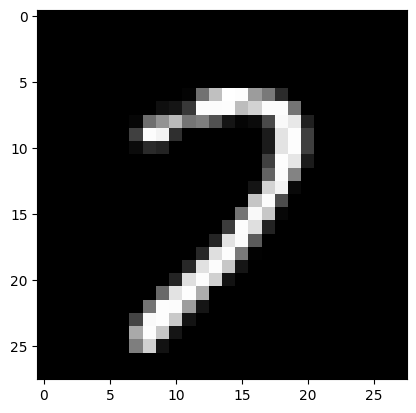

In [ ]:
test_prediction(11, parameters)

## Prepare Submission File

In [ ]:
test_preds = make_predictions(parameters, X_test)
test_preds.shape
test_submission_preds = test_preds.T
submission_df = pd.read_csv('./digit-recognizer/sample_submission.csv')
submission_df['Label'] = test_submission_preds

In [ ]:
submission_df.sample(20)

,ImageId,Label
24703,24704,1
6485,6486,1
20343,20344,5
25323,25324,8
7134,7135,1
26097,26098,5
21518,21519,8
21703,21704,2
16250,16251,4
27622,27623,8


In [ ]:
submission_df.to_csv('submission.csv', index=None)